In [2]:
# tensorflow practice/learning
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split to testing + training

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape # dataset appearance; 60k images 28x28 pixels (training images)

(60000, 28, 28)

In [10]:
train_images[0,23,23] # for one pixel always 0-255 (0= black vs 255= white)

194

In [11]:
type(train_images) # type; numPy array

numpy.ndarray

In [61]:
print(train_images) # for multiple pixels

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [52]:
train_labels[:10] # first 10 training labels 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

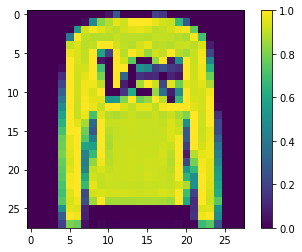

In [54]:
# visualise
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
# data reprocessing (do to both training and testing images)
train_images = train_images / 255.0
train_images = test_images / 255.0

In [62]:
# building the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (flattening the pixels into 128 pixels)
    keras.layers.Dense(128, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='softmax')]) # output layer (10 output neurons for 10 classes) 

In [63]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])      

In [72]:
# evaluating the model

# model.fit(train_images, train_labels, epochs=10)- edit epochs to get the most appropriate accuracy possible

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

# note: look out overtesting and undertesting; this has been undertesting (just getting used to using TensorFlow so doesn't matter right now)

In [73]:
# making predictions using the previous data 
predictions = model.predict(test_images)

In [74]:
test_images.shape # this is an array- put the line above as 'predictions = model.predict([test_images[0]]) if not already an array/only one item 

(10000, 28, 28)

In [76]:
print(predictions)
print(np.argmax(predictions[0])) # for class 

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
9
